In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("1651277648862_healthinsurance.csv")

In [3]:
df.shape

(15000, 13)

In [4]:
df.head(10)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
5,42.0,female,89,37.9,NoDisease,0,0,AtlanticCity,78,0,0,Dancer,6474.0
6,18.0,male,59,23.8,NoDisease,0,0,Portland,64,0,0,Singer,1705.6
7,21.0,male,52,26.8,NoDisease,0,0,Cambridge,74,1,0,Actor,1534.3
8,63.0,male,55,NaN,NoDisease,0,0,Hartford,70,1,0,Dancer,13390.6
9,40.0,female,69,29.6,NoDisease,0,0,Springfield,64,1,1,DataScientist,5910.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [6]:
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [7]:
for column in df.columns:
    unique_count = df[column].nunique()  # Number of unique values
    unique_values = df[column].unique()  # List of unique values
    print(f"Number of unique values in {column}: {unique_count}")
    #print(f"Unique values in {column}: {unique_values}\n")

Number of unique values in age: 47
Number of unique values in sex: 2
Number of unique values in weight: 58
Number of unique values in bmi: 269
Number of unique values in hereditary_diseases: 10
Number of unique values in no_of_dependents: 6
Number of unique values in smoker: 2
Number of unique values in city: 91
Number of unique values in bloodpressure: 69
Number of unique values in diabetes: 2
Number of unique values in regular_ex: 2
Number of unique values in job_title: 35
Number of unique values in claim: 2054


In [8]:
for column in df.columns:
    unique_count = df[column].nunique()  # Number of unique values
    unique_values = df[column].unique()  # List of unique values
    print(f"Number of unique values in {column}: {unique_count}")
    print(f"Unique values in {column}: {unique_values}\n")

Number of unique values in age: 47
Unique values in age: [60. 49. 32. 61. 19. 42. 18. 21. 63. 40. 51. 59. 27. 56. 52. 20. 24. 53.
 38. 54. 64. 50. 46. 55. 36. 44. 62. 48. 31. 43. 47. 41. 22. 45. 57. nan
 23. 58. 28. 34. 26. 35. 25. 37. 33. 29. 30. 39.]

Number of unique values in sex: 2
Unique values in sex: ['male' 'female']

Number of unique values in weight: 58
Unique values in weight: [64 75 53 50 89 59 52 55 69 68 45 67 46 76 44 60 82 40 71 61 70 84 51 48
 62 94 41 57 49 85 79 90 72 43 65 91 88 80 74 47 56 54 83 73 81 77 66 58
 86 95 93 78 92 63 42 87 34 36]

Number of unique values in bmi: 269
Unique values in bmi: [24.3 22.6 17.8 36.4 20.6 37.9 23.8 26.8  nan 29.6 33.  36.5 24.6 35.7
 18.9 40.3 27.2 41.3 38.4 28.5 31.8 31.3 25.7 25.3 24.8 39.4 25.5 26.9
 24.  37.1 44.8 25.1 32.3 28.7 35.2 26.7 26.4 22.3 25.8 21.9 40.2 38.6
 39.2 28.9 25.9 32.7 29.7 26.  35.6 46.8 34.2 23.1 31.6 40.9 27.6 22.9
 18.3 25.2 34.4 34.1 23.9 22.1 32.2 38.3 37.3 33.2 33.3 27.7 31.4 46.5
 35.3 27.5 23.5 

In [9]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


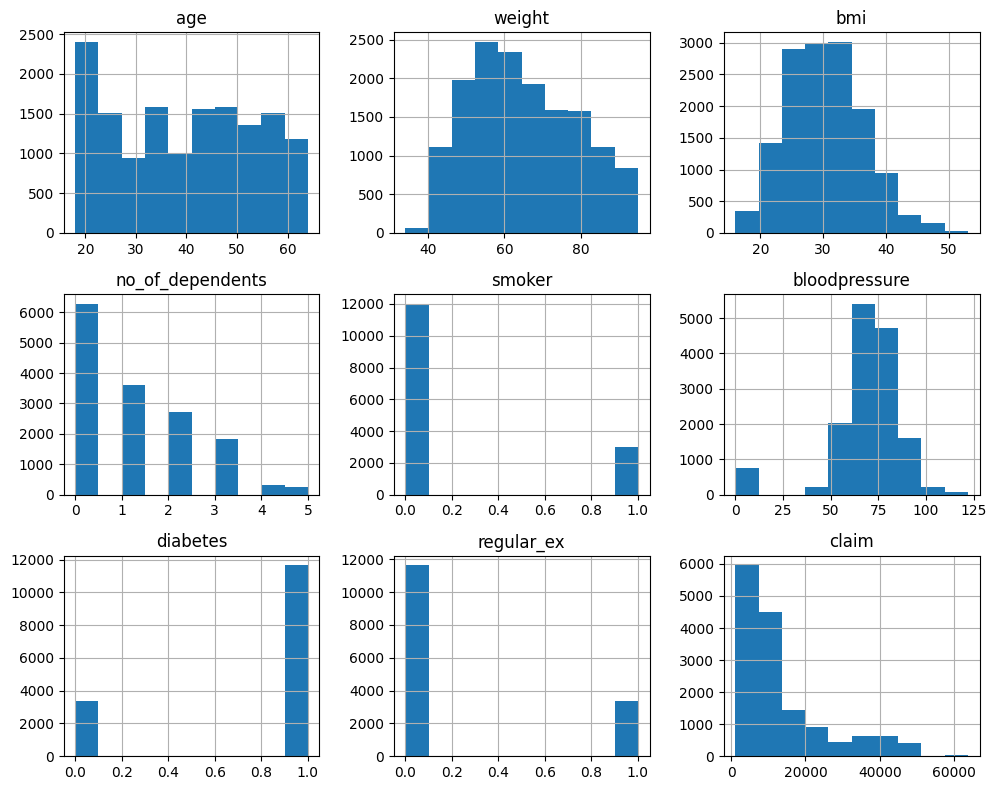

In [10]:
df.hist(figsize = (10,8))
plt.tight_layout()  # Adjusts subplots to fit into figure area.
plt.show()

# The histograms you've generated provide insights into the distribution of each attribute in your dataset. Here's what each distribution implies:

1. **Age:**
   - The distribution is somewhat uniform with a slight peak around the 20-30 age range.
This indicates that your dataset has a fairly even distribution of ages with a few more individuals in their 20s and 30s.

2. **Weight:**
   - The weight distribution is approximately normal (bell-shaped), with most values clustering around the center.
This suggests that the majority of individuals have weights around the average value in the dataset.

3. **BMI (Body Mass Index):**
   - The BMI distribution also appears to be approximately normal, indicating that most individuals fall within 
a common range of BMI values, with fewer individuals at the extremes.

4. **Number of Dependents:**
   - This distribution is skewed to the right, with a majority of individuals having 0 or 1 dependent. 
As the number of dependents increases, the frequency decreases, indicating fewer people have many dependents.

5. **Smoker:**
   - This is a binary variable (likely coded as 0 for non-smokers and 1 for smokers).
The distribution shows a high number of non-smokers (0s) and a smaller number of smokers (1s).

6. **Blood Pressure:**
   - The blood pressure values seem to cluster around a central range, likely indicating a typical 
blood pressure level in the population, with fewer instances of very low or very high blood pressure.

7. **Diabetes:**
   - This is likely a binary variable (coded as 0 for no diabetes and 1 for diabetes). 
The distribution shows that most of the population does not have diabetes, with a smaller number having diabetes.

8. **Regular Exercise:**
   - Similar to the smoker and diabetes variables, this is likely binary, showing the number of people 
who engage in regular exercise (1) versus those who do not (0). It seems that a majority of the individuals exercise regularly.

9. **Claim:**
   - This distribution is highly skewed to the right, indicating that most claim amounts are relatively low, 
with a few high claims. This is common in financial data, where most individuals may not make large claims,
but a small number of individuals may have high claims.

### Implications for Data Analysis:
- **Skewness:** Some distributions, like `no_of_dependents` and `claim`, are skewed. You may need to apply transformations 
    (e.g., log transformation) if using certain types of models that assume normally distributed data.
- **Imbalance:** Binary variables like `smoker`, `diabetes`, and `regular_ex` show imbalances. If these are used as
    target variables, you might need to address this imbalance (e.g., using oversampling or undersampling techniques).
- **Normal Distribution:** Variables like `weight` and `bmi` being normally distributed are good for certain types of 
    analyses, but ensure the model assumptions align with these distributions.

Overall, these distributions help you understand the nature of your data, guiding you in making decisions on preprocessing and modeling techniques.

Combined List of Attributes with Data Types:
Age: Age of the policyholder (Numeric)


Diabetes: Diabetes status of the customer (0 = No, 1 = Yes) (Numeric/Binary)

BloodPressureProblems: Whether the customer has blood pressure issues (0 = No, 1 = Yes) (Numeric/Binary)

AnyTransplants: Whether the customer has undergone any major organ transplants (0 = No, 1 = Yes) (Numeric/Binary)

AnyChronicDiseases: Presence of chronic ailments like asthma, heart disease, etc. (0 = No, 1 = Yes) (Numeric/Binary)

Height: Height of the customer in centimeters (Numeric)

Weight: Weight of the customer in kilograms (Numeric)

KnownAllergies: Any known allergies (0 = No, 1 = Yes) (Numeric/Binary)

HistoryOfCancerInFamily: Family history of cancer (0 = No, 1 = Yes) (Numeric/Binary)

NumberOfMajorSurgeries: Number of major surgeries the customer has undergone (Numeric)

PremiumPrice: Insurance premium amount (Numeric)

Additional Attributes:
SmokingStatus: Whether the customer is a smoker (0 = No, 1 = Yes) (Numeric/Binary)

AlcoholConsumption: Frequency of alcohol consumption (0 = None, 1 = Occasionally, 2 = Regularly) (Categorical)

OccupationRisk: Risk level associated with occupation (1 = Low Risk, 2 = Medium Risk, 3 = High Risk) (Categorical)

ExerciseHabits: Whether the customer exercises regularly (0 = No, 1 = Yes) (Numeric/Binary)

Region: Geographic region of the customer (1 = Low-Cost Region, 2 = Medium-Cost Region, 3 = High-Cost Region) (Categorical)

CholesterolLevel: Customer's cholesterol level (mg/dL) (Numeric) Scaling to ensure they are not weighted more 

PreExistingConditions: Number of pre-existing conditions (Numeric)

CreditScore: Credit score of the customer (Numeric)

ClaimHistory: Number of claims previously filed (Numeric)

DrivingRecord: Number of traffic violations (for auto insurance) (Numeric)(violations+accidents)

DeductibleAmount: Deductible amount of the insurance (Numeric)

CoverageAmount: Coverage amount provided by the insurance policy (Numeric)




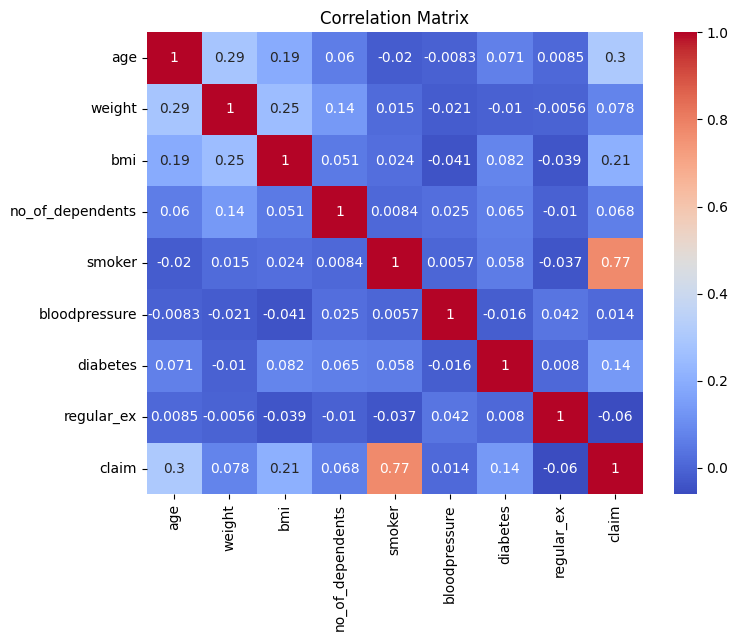

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering 

Imputation of missing values 

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])


In [13]:

df['hereditary_diseases'] = label_encoder.fit_transform(df['hereditary_diseases'])
df['city'] = label_encoder.fit_transform(df['city'])
df['job_title'] = label_encoder.fit_transform(df['job_title'])


In [14]:
df.head(10)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2,13112.6
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16,9567.0
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0,32734.2
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10,48517.6
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22,1731.7
5,42.0,0,89,37.9,8,0,0,1,78,0,0,12,6474.0
6,18.0,1,59,23.8,8,0,0,65,64,0,0,32,1705.6
7,21.0,1,52,26.8,8,0,0,9,74,1,0,2,1534.3
8,63.0,1,55,NaN,8,0,0,29,70,1,0,12,13390.6
9,40.0,0,69,29.6,8,0,0,79,64,1,1,13,5910.9


In [15]:
from sklearn.impute import KNNImputer


knn_imputer = KNNImputer(n_neighbors=3)

# Fit and transform the data (KNN will consider other features for imputation)
df[['age', 'bmi']] = knn_imputer.fit_transform(df[['age', 'bmi']])

In [16]:
df.head(5)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2,13112.6
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16,9567.0
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0,32734.2
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10,48517.6
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22,1731.7


In [17]:
# setting feature and target columns
x=df.drop(['claim'],axis=1)
y=df['claim']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
y_train[0]


13112.6

In [20]:
# Import machine learning algorithms from scikit-learn (Sklearn)
from sklearn.linear_model import LinearRegression  # Import Linear Regression for regression tasks
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestClassifier for regression tasks
from sklearn.svm import SVR  # Import Support Vector Regression for regression tasks
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor for regression tasks
from sklearn import metrics 

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
# Initialize and train a Support Vector Regression (SVR) model
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [23]:
# Initialize and train a Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
# Initialize and train a Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
X=df.drop(['claim'],axis=1)
y=df['claim']

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Assuming df is your DataFrame and it contains 'Actual' values for comparison
# For example purposes, 

# Define features (X) and target (y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = lr.predict(X_test)

# Evaluate the model using R-squared, MAE, and RMSE
lr_r2_score = metrics.r2_score(y_test, y_pred1)
mae_lr = metrics.mean_absolute_error(y_test, y_pred1)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))

print("R-squared Score for Linear Regression (LR):", lr_r2_score)
print("MAE for Linear Regression (LR):", mae_lr)
print("RMSE for Linear Regression (LR):", rmse_lr)

# Adding predictions to the DataFrame for comparison
df['LR'] = lr.predict(X)



R-squared Score for Linear Regression (LR): 0.743453313625979
MAE for Linear Regression (LR): 4137.379857778153
RMSE for Linear Regression (LR): 6189.934057188856


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = lr.predict(X_test)

# Evaluate the model using R-squared, MAE, and RMSE
lr_r2_score = metrics.r2_score(y_test, y_pred1)
mae_lr = metrics.mean_absolute_error(y_test, y_pred1)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))

print("R-squared Score for Linear Regression (LR):", lr_r2_score)
print("MAE for Linear Regression (LR):", mae_lr)
print("RMSE for Linear Regression (LR):", rmse_lr)

# Adding predictions to the DataFrame for comparison
df['LR'] = lr.predict(X)


R-squared Score for Linear Regression (LR): 0.743453313625979
MAE for Linear Regression (LR): 4137.379857778153
RMSE for Linear Regression (LR): 6189.934057188856


In [28]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define the SVR model with specified parameters
svr = SVR(kernel='rbf', C=1, gamma='scale')

# Fit the model
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred_svr = svr.predict(X_test)
print("R-squared Score for SVR:", r2_score(y_test, y_pred_svr))
print("MAE for SVR:", mean_absolute_error(y_test, y_pred_svr))
print("RMSE for SVR:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))


R-squared Score for SVR: -0.10373177691246016
MAE for SVR: 8289.891254569035
RMSE for SVR: 12839.100274541086


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model with specified parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Fit the model
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("R-squared Score for RF:", r2_score(y_test, y_pred_rf))
print("MAE for RF:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE for RF:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


R-squared Score for RF: 0.9689524225706316
MAE for RF: 452.7548216666757
RMSE for RF: 2153.360176223927


In [30]:

gbm = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3, min_samples_split=2, min_samples_leaf=1)

gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)
print("R-squared Score for GBM:", r2_score(y_test, y_pred_gbm))
print("MAE for GBM:", mean_absolute_error(y_test, y_pred_gbm))
print("RMSE for GBM:", np.sqrt(mean_squared_error(y_test, y_pred_gbm)))


R-squared Score for GBM: 0.8598530797432526
MAE for GBM: 2718.500213620377
RMSE for GBM: 4575.03685435847


In [31]:
new_df = pd.DataFrame(X_train,index=[0])
new_df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2


In [32]:
# Use the trained Gradient Boosting Regressor (GR) model to make predictions for a new customer
new_pred = gbm.predict(new_df)

# Print the predicted medical insurance cost for the new customer
print("Medical Insurance cost for New Customer is:", new_pred[0])

Medical Insurance cost for New Customer is: 15525.817757378


In [33]:
# Use the trained Gradient Boosting Regressor (GR) model to make predictions for a new customer
new_pred = rf.predict(new_df)

# Print the predicted medical insurance cost for the new customer
print("Medical Insurance cost for New Customer is:", new_pred[0])

Medical Insurance cost for New Customer is: 13112.600000000008


In [34]:
# Use the trained Gradient Boosting Regressor (GR) model to make predictions for a new customer
new_pred = lr.predict(new_df)

# Print the predicted medical insurance cost for the new customer
print("Medical Insurance cost for New Customer is:", new_pred[0])

Medical Insurance cost for New Customer is: 11147.863705028176


In [35]:
# Use the trained Gradient Boosting Regressor (GR) model to make predictions for a new customer
new_pred = svr.predict(new_df)

# Print the predicted medical insurance cost for the new customer
print("Medical Insurance cost for New Customer is:", new_pred[0])

Medical Insurance cost for New Customer is: 9651.210728825044


In [36]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize the Lasso model with a chosen alpha (regularization strength)
lasso = Lasso(alpha=1.0)

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
lasso_r2_score = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("R-squared Score for Lasso Regression:", lasso_r2_score)
print("MAE for Lasso Regression:", mae_lasso)
print("RMSE for Lasso Regression:", rmse_lasso)


R-squared Score for Lasso Regression: 0.7434629851613848
MAE for Lasso Regression: 4137.249908333309
RMSE for Lasso Regression: 6189.817379145821


In [37]:
from sklearn.linear_model import Ridge

# Initialize the Ridge model with a chosen alpha (regularization strength)
ridge = Ridge(alpha=1.0)

# Fit the model on the training data
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
ridge_r2_score = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("R-squared Score for Ridge Regression:", ridge_r2_score)
print("MAE for Ridge Regression:", mae_ridge)
print("RMSE for Ridge Regression:", rmse_ridge)


R-squared Score for Ridge Regression: 0.7434562713743693
MAE for Ridge Regression: 4138.173725987328
RMSE for Ridge Regression: 6189.898374950035
